In [1]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

    Updating registry at `C:\Users\Prabhat Malhan\.julia\registries\General`
   Resolving package versions...
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Prabhat Malhan\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\Prabhat 

In [1]:
using CSV
using DataFrames
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

ENV["COLUMNS"]=1000

1000

In [2]:

df=DataFrame(CSV.File("Life_Expectancy.csv"))
first(df,5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
,String,Int64,String,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.2796,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.5236,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.2192,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9
4,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.1842,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.09711,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5


In [3]:
println(size(df))

describe(df)

(2938, 22)


,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Country,,Afghanistan,,Zimbabwe,0,String
2,Year,2007.52,2000,2008.0,2015,0,Int64
3,Status,,Developed,,Developing,0,String
4,Life expectancy,69.2249,36.3,72.0,89.0,0,Float64
5,Adult Mortality,164.796,1.0,144.0,723.0,0,Float64
6,infant deaths,30.3039,0,3.0,1800,0,Int64
7,Alcohol,4.60286,0.01,4.16,17.87,0,Float64
8,percentage expenditure,738.251,0.0,64.9129,19479.9,0,Float64
9,Hepatitis B,80.9405,1.0,87.0,99.0,0,Float64


In [4]:
names(df)

22-element Vector{String}:
 "Country"
 "Year"
 "Status"
 "Life expectancy "
 "Adult Mortality"
 "infant deaths"
 "Alcohol"
 "percentage expenditure"
 "Hepatitis B"
 "Measles "
 " BMI "
 "under-five deaths "
 "Polio"
 "Total expenditure"
 "Diphtheria "
 " HIV/AIDS"
 "GDP"
 "Population"
 " thinness  1-19 years"
 " thinness 5-9 years"
 "Income composition of resources"
 "Schooling"

In [5]:
colnames=Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," "=>"_"),"-"=>"_"),"/"=>"_")))
end

rename!(df,colnames);

In [6]:
names(df)

22-element Vector{String}:
 "Country"
 "Year"
 "Status"
 "Life_expectancy"
 "Adult_Mortality"
 "infant_deaths"
 "Alcohol"
 "percentage_expenditure"
 "Hepatitis_B"
 "Measles"
 "BMI"
 "under_five_deaths"
 "Polio"
 "Total_expenditure"
 "Diphtheria"
 "HIV_AIDS"
 "GDP"
 "Population"
 "thinness__1_19_years"
 "thinness_5_9_years"
 "Income_composition_of_resources"
 "Schooling"

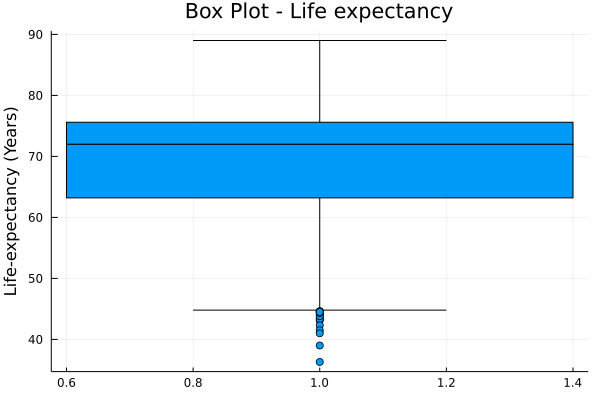

In [7]:
boxplot(df.Life_expectancy,title="Box Plot - Life expectancy",ylabel="Life-expectancy (Years)",legend=false)

In [8]:
first_percentile=percentile(df.Life_expectancy,25)
iqr_value=iqr(df.Life_expectancy)
df=df[df.Life_expectancy.>(first_percentile-1.5*iqr_value),:];

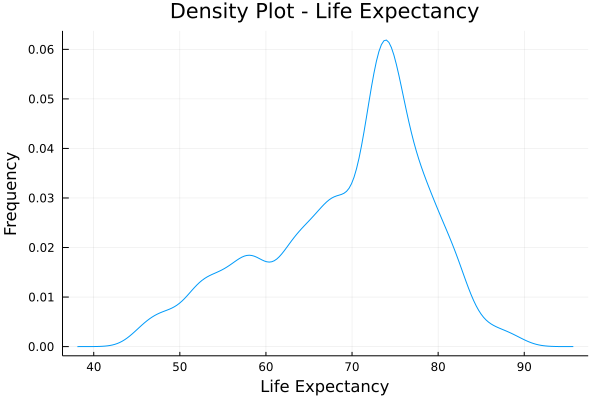

In [9]:
density(df.Life_expectancy,title="Density Plot - Life Expectancy",ylabel="Frequency",xlabel="Life Expectancy",legend=false)

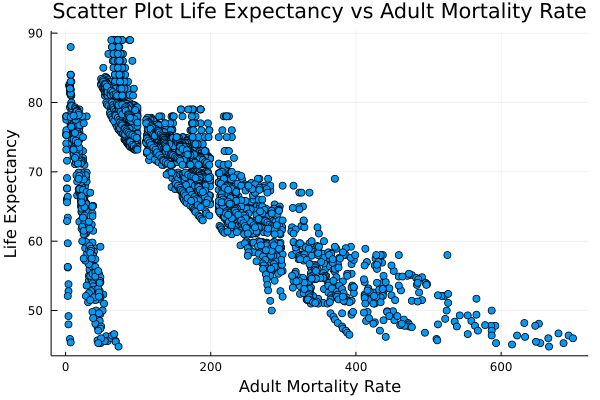

In [10]:
train_plot= scatter(df.Adult_Mortality,df.Life_expectancy,title="Scatter Plot Life Expectancy vs Adult Mortality Rate",ylabel="Life Expectancy",xlabel="Adult Mortality Rate",legend=false)

In [11]:
df=df[:,Not(:Country)];

In [12]:
df=df[:,Not(:Status)]

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2015,65.0,263.0,62,0.01,71.2796,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259,3.37365e7,17.2,17.3,0.479,10.1
2,2014,59.9,271.0,64,0.01,73.5236,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.697,327582.0,17.5,17.5,0.476,10.0
3,2013,59.9,268.0,66,0.01,73.2192,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.745,3.17317e7,17.7,17.7,0.47,9.9
4,2012,59.5,272.0,69,0.01,78.1842,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3.69696e6,17.9,18.0,0.463,9.8
5,2011,59.2,275.0,71,0.01,7.09711,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.5372,2.9786e6,18.2,18.2,0.454,9.5
6,2010,58.8,279.0,74,0.01,79.6794,66.0,1989,16.7,102,66.0,9.2,66.0,0.1,553.329,2.88317e6,18.4,18.4,0.448,9.2
7,2009,58.6,281.0,77,0.01,56.7622,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893,284331.0,18.6,18.7,0.434,8.9
8,2008,58.1,287.0,80,0.03,25.8739,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361,2.72943e6,18.8,18.9,0.433,8.7
9,2007,57.5,295.0,82,0.02,10.9102,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.836,2.66168e7,19.0,19.1,0.415,8.4


In [13]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df,.75)

(2239×20 DataFrame
  Row │ Year   Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  Hepatitis_B  Measles  BMI      under_five_deaths  Polio    Total_expenditure  Diphtheria  HIV_AIDS  GDP       Population      thinness__1_19_years  thinness_5_9_years  Income_composition_of_resources  Schooling 
      │ Int64  Float64          Float64          Int64          Float64  Float64                 Float64      Int64    Float64  Int64              Float64  Float64            Float64     Float64   Float64   Float64         Float64               Float64             Float64                          Float64   
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │  2015             65.0            263.0       

In [14]:
fm = @formula(Life_expectancy ~ Adult_Mortality)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Life_expectancy ~ 1 + Adult_Mortality

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)      78.062      0.238558    327.22    <1e-99  77.5942     78.5298
Adult_Mortality  -0.0532255  0.00119132  -44.68    <1e-99  -0.0555617  -0.0508893
─────────────────────────────────────────────────────────────────────────────────

In [15]:
r2(linearRegressor)

0.4715461171068247

In [16]:
ypredicted_test=predict(linearRegressor,test)
ypredicted_train=predict(linearRegressor,train)

performance_testdf = DataFrame(y_actual=test[!,:Life_expectancy],y_predicted=ypredicted_test)
performance_testdf.error=performance_testdf[!,:y_actual]-performance_testdf[!,:y_predicted]
performance_testdf.error_sq=performance_testdf.error.*performance_testdf.error

performance_traindf = DataFrame(y_actual=train[!,:Life_expectancy],y_predicted=ypredicted_train)
performance_traindf.error=performance_traindf[!,:y_actual]-performance_traindf[!,:y_predicted]
performance_traindf.error_sq=performance_traindf.error.*performance_traindf.error

2239-element Vector{Float64}:
    0.8767023932656874
   13.971689939812148
   15.190886542307808
   16.684340404707243
   19.466349638555428
   20.300590842300075
   21.961078602936233
   25.60826696642953
   27.80835748763987
   29.887127672115906
   32.04082033644265
  470.9897337898319
   38.150374777969766
    ⋮
    0.3628211779604543
  798.3757850588639
  834.598413595818
   46.53672411164034
    0.7826488839909221
    1.380595775295521
    2.355129152394412
    5.701815727209035
   10.121150762799214
 1042.6050952481442
  862.979639968759
   11.108636611640154

In [17]:
function mape(performance_df)
    mape=mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

In [18]:
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

In [19]:
println("Mean Absolute test error : ",mean(abs.(performance_testdf.error)),"\n")
println("Mean Absolute Percentage test error : ",mape(performance_testdf),"\n")
println("Root Mean Square test error : ",rmse(performance_testdf),"\n")
println("Mean Square test error : ",mean(performance_testdf.error_sq),"\n")

Mean Absolute test error : 4.8708553981572065

Mean Absolute Percentage test error : 0.07481377612106675

Root Mean Square test error : 6.960324763466767

Mean Square test error : 48.44612081292871



In [20]:
println("Mean Absolute train error : ",mean(abs.(performance_traindf.error)),"\n")
println("Mean Absolute Percentage train error : ",mape(performance_traindf),"\n")
println("Root Mean Square train error : ",rmse(performance_traindf),"\n")
println("Mean Square train error : ",mean(performance_traindf.error_sq),"\n")

Mean Absolute train error : 4.718459156497247

Mean Absolute Percentage train error : 0.07225536758476038

Root Mean Square train error : 6.687492494368096

Mean Square train error : 44.72255586222961



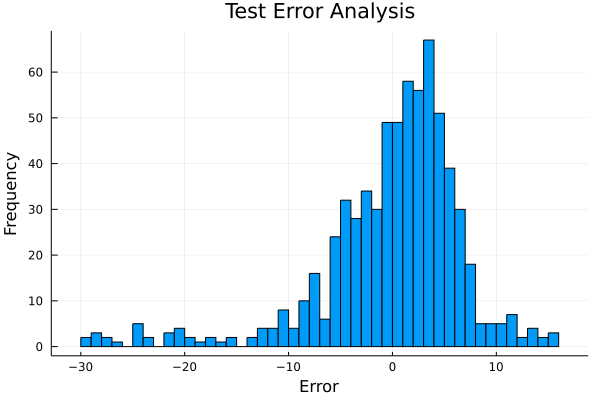

In [21]:
histogram(performance_testdf.error,bins=50,title="Test Error Analysis",ylabel="Frequency",xlabel="Error",legend=false)

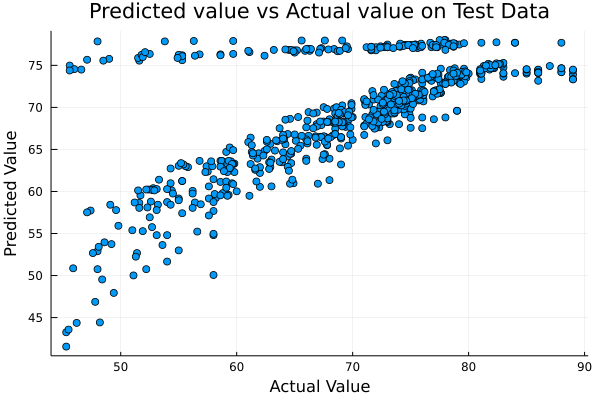

In [22]:
test_plot=scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted],title="Predicted value vs Actual value on Test Data",ylabel="Predicted Value",xlabel="Actual Value",legend=false)

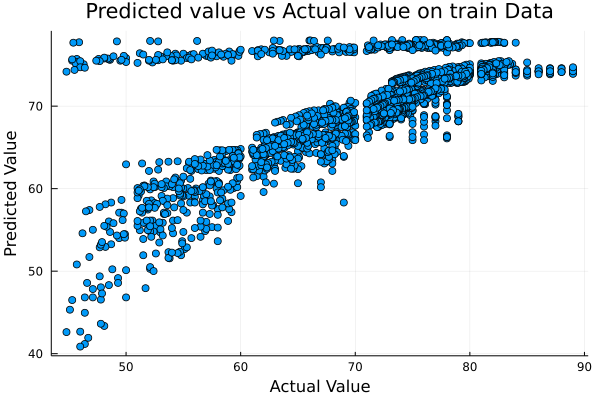

In [23]:
train_plot=scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted],title="Predicted value vs Actual value on train Data",ylabel="Predicted Value",xlabel="Actual Value",legend=false)

In [24]:
function cross_validation(train,k,fm=@formula(Life_expentency ~ Adult_Mortality))
    a=collect(Kfold(size(train)[1],k))
    for i in i:k
        row=a[i]
        temp_train=train[row,:]
        temp_test=train[setdiff(1:end,row),:]
        linearRegressor=lm(fm,temp_train)
        performance_testdf = DataFrame(y_actual=temp_test[!,:Life_expectancy],y_predicted=predict((linearRegressor,temp_test)))
        performance_testdf.error=performance_testdf[!,:y_actual]-performance_testdf[!,:y_predicted]
    end
end

cross_validation (generic function with 2 methods)